## PyTorch Recurrent Neural Network

Below is an implementation of recurrent neural network (RNN) with PyTorch to forecast the revenue of certain a company from 2015 to 2020.

The data is taken from [here](https://www.kaggle.com/datasets/podsyp/time-series-starter-dataset).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import torch

In [2]:
data_path = '/content/drive/MyDrive/Colab Notebooks/data/Time Series Starter Dataset/Month_Value_1.csv'

df = pd.read_csv(data_path)

In [3]:
df

Period       Revenue  Sales_quantity  Average_cost  \
0   01.01.2015  1.601007e+07         12729.0   1257.763541   
1   01.02.2015  1.580759e+07         11636.0   1358.507000   
2   01.03.2015  2.204715e+07         15922.0   1384.697024   
3   01.04.2015  1.881458e+07         15227.0   1235.606705   
4   01.05.2015  1.402148e+07          8620.0   1626.621765   
..         ...           ...             ...           ...   
91  01.08.2022           NaN             NaN           NaN   
92  01.09.2022           NaN             NaN           NaN   
93  01.10.2022           NaN             NaN           NaN   
94  01.11.2022           NaN             NaN           NaN   
95  01.12.2022           NaN             NaN           NaN   

    The_average_annual_payroll_of_the_region  
0                                 30024676.0  
1                                 30024676.0  
2                                 30024676.0  
3                                 30024676.0  
4                                 30024676.0  
..                                       ...  
91                                       NaN  
92                                       NaN  
93                                       NaN  
94                                       NaN  
95                                       NaN  

[96 rows x 5 columns]

Remove empty data

In [4]:
df = df.dropna()
df

Period       Revenue  Sales_quantity  Average_cost  \
0   01.01.2015  1.601007e+07         12729.0   1257.763541   
1   01.02.2015  1.580759e+07         11636.0   1358.507000   
2   01.03.2015  2.204715e+07         15922.0   1384.697024   
3   01.04.2015  1.881458e+07         15227.0   1235.606705   
4   01.05.2015  1.402148e+07          8620.0   1626.621765   
..         ...           ...             ...           ...   
59  01.12.2019  5.875647e+07         38069.0   1543.420464   
60  01.01.2020  5.628830e+07         27184.0   2070.640850   
61  01.02.2020  4.022524e+07         23509.0   1711.057181   
62  01.03.2020  5.002217e+07         32569.0   1535.882748   
63  01.04.2020  5.232069e+07         26615.0   1965.834790   

    The_average_annual_payroll_of_the_region  
0                                 30024676.0  
1                                 30024676.0  
2                                 30024676.0  
3                                 30024676.0  
4                                 30024676.0  
..                                       ...  
59                                29878525.0  
60                                29044998.0  
61                                29044998.0  
62                                29044998.0  
63                                29044998.0  

[64 rows x 5 columns]

Plot the data

Text(0.5, 1.0, 'Revenue')

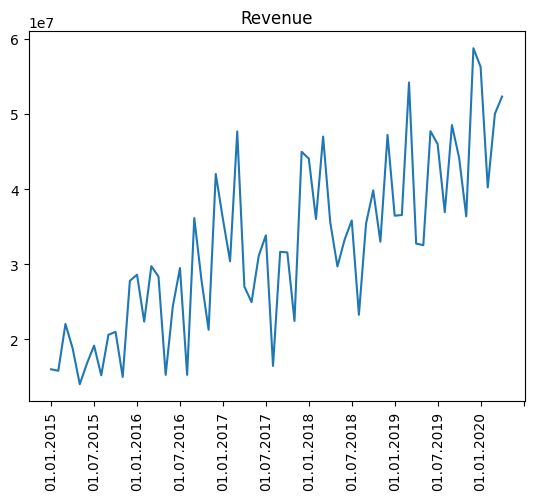

In [5]:
fig, ax = plt.subplots()
ax.plot(df['Period'], df['Revenue'])
plt.xticks(rotation=90)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=6))
plt.title("Revenue")

In [6]:
data = df['Revenue']
date = df['Period']

In this case, the data is divided into two categories: train and test. The composition of the train data is 70% of cleaned data while the other 30% is the test data.

In [7]:
train_len = int(round(0.7*len(data), 0))

train = data[:train_len]
test = data[train_len:]
train_index = date[:train_len]
test_index = date[train_len:]

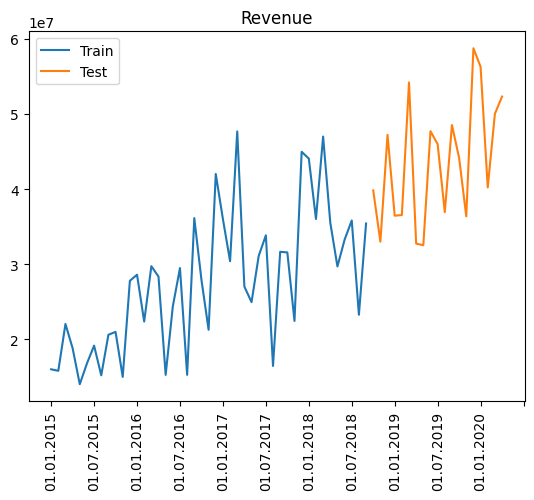

In [8]:
fig, ax = plt.subplots()
ax.plot(train_index, train.values, label="Train")
ax.plot(test_index, test.values, label="Test")
plt.xticks(rotation=90)
plt.title("Revenue")
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=6))
plt.legend()

Scaling is used in this case to make the train process quick. Otherwise it would have taken so much time to train the model.

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
train = scaler.fit_transform(train.values.reshape(-1, 1))
test = scaler.fit_transform(test.values.reshape(-1, 1))

In this model, the model will try to predict the next revenue for the company based on the previous four revenues. To do that, sequence the data in 4 months length.

In [10]:
# Sequencing Train
sequence_length = 4
X_train, y_train = [], []

for i in range(len(train)-sequence_length):
  X_train.append(train[i:i+sequence_length])
  y_train.append(train[i+1:i+sequence_length+1])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_train.shape, y_train.shape

(torch.Size([41, 4, 1]), torch.Size([41, 4, 1]))

In [11]:
# Sequencing Test
sequence_length = 4
X_test, y_test = [], []

for i in range(len(test)-sequence_length):
  X_test.append(test[i:i+sequence_length])
  y_test.append(test[i+1:i+sequence_length+1])
X_test, y_test = np.array(X_test), np.array(y_test)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
X_test.shape, y_test.shape

(torch.Size([15, 4, 1]), torch.Size([15, 4, 1]))

The model use recurrent neural network (RNN) to predict the next revenue. More on RNN can be read here:

- [https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks)

- [https://machinelearningmastery.com/an-introduction-to-recurrent-neural-networks-and-the-math-that-powers-them/](https://machinelearningmastery.com/an-introduction-to-recurrent-neural-networks-and-the-math-that-powers-them/)

- [https://towardsdatascience.com/all-you-need-to-know-about-rnns-e514f0b00c7c](https://towardsdatascience.com/all-you-need-to-know-about-rnns-e514f0b00c7c)

In [12]:
class RNNmodel(torch.nn.Module):
  def __init__(self, input_size, hidden_size, num_layers):
    super(RNNmodel, self).__init__()
    self.rnn = torch.nn.RNN(input_size, hidden_size, num_layers, batch_first=True, nonlinearity='relu')
    self.linear = torch.nn.Linear(hidden_size, 1)

  def forward(self, x):
    output, h = self.rnn(x)
    output = self.linear(output)
    return output

In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


Define: the model, the loss function, and the optimizer.

In [14]:
input_size = 1
num_layers = 10
hidden_size = 100
output_size = 1

# Define the model, loss function, and optimizer
model = RNNmodel(input_size, hidden_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss(reduction='mean')

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
print(model)

RNNmodel(
  (rnn): RNN(1, 100, num_layers=10, batch_first=True)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)


Create batches from the data to make the training process quicker.

In [15]:
batch_size = 16
# Create DataLoader for batch training
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Create DataLoader for batch training
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Train the data

In [16]:
# number of epochs to train the data
epochs = 8000

# empty list to store the performance of the model
train_history =[]
test_history =[]

# Training loop
for epoch in range(epochs):
    total_loss = 0.0

    # Training
    model.train()
    for batch_X, batch_y in train_loader:
        # reset the gradient for current loop
        optimizer.zero_grad()

        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        # predict the train data
        predictions = model(batch_X)
        # calculate the loss
        loss = loss_fn(predictions, batch_y)
        # calculate gradient
        loss.backward()
        # update the parameter based on the gradient and optimizer
        optimizer.step()

        total_loss += loss.item()

    # Calculate average training loss and accuracy
    average_loss = total_loss / len(train_loader)
    train_history.append(average_loss)

    # Validation on test data
    model.eval()
    with torch.no_grad():
        total_test_loss = 0.0

        for batch_X_test, batch_y_test in test_loader:
            batch_X_test, batch_y_test = batch_X_test.to(device), batch_y_test.to(device)
            # predict the test data
            predictions_test = model(batch_X_test)
            # calculate the loss
            test_loss = loss_fn(predictions_test, batch_y_test)

            total_test_loss += test_loss.item()

        # Calculate average test loss and accuracy
        average_test_loss = total_test_loss / len(test_loader)
        test_history.append(average_test_loss)

    if (epoch+1)%100==0:
        print(f'Epoch [{epoch+1}/{epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}')

Epoch [100/8000] - Training Loss: 0.0386, Test Loss: 0.1136
Epoch [200/8000] - Training Loss: 0.0280, Test Loss: 0.1130
Epoch [300/8000] - Training Loss: 0.0178, Test Loss: 0.1246
Epoch [400/8000] - Training Loss: 0.0170, Test Loss: 0.1291
Epoch [500/8000] - Training Loss: 0.0133, Test Loss: 0.1361
Epoch [600/8000] - Training Loss: 0.0152, Test Loss: 0.1401
Epoch [700/8000] - Training Loss: 0.0113, Test Loss: 0.1298
Epoch [800/8000] - Training Loss: 0.0141, Test Loss: 0.1302
Epoch [900/8000] - Training Loss: 0.0180, Test Loss: 0.1425
Epoch [1000/8000] - Training Loss: 0.0111, Test Loss: 0.1330
Epoch [1100/8000] - Training Loss: 0.0111, Test Loss: 0.1327
Epoch [1200/8000] - Training Loss: 0.0107, Test Loss: 0.1298
Epoch [1300/8000] - Training Loss: 0.0142, Test Loss: 0.1165
Epoch [1400/8000] - Training Loss: 0.0118, Test Loss: 0.1204
Epoch [1500/8000] - Training Loss: 0.0089, Test Loss: 0.1262
Epoch [1600/8000] - Training Loss: 0.0108, Test Loss: 0.1380
Epoch [1700/8000] - Training Loss

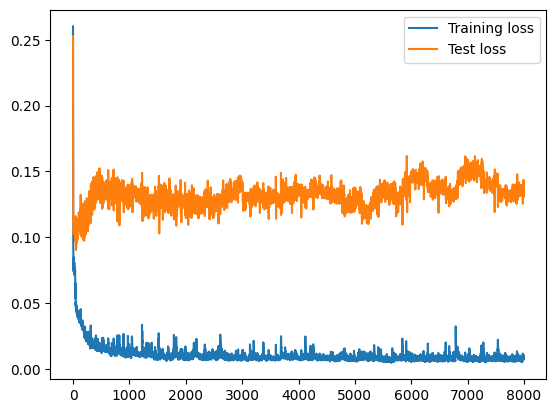

In [17]:
# visualize the train and test loss
plt.plot(train_history, label="Training loss")
plt.plot(test_history, label="Test loss")
plt.legend()
plt.show()

In [18]:
# Define the number of future time steps to forecast
num_forecast_steps = 19

# Convert to NumPy and remove singleton dimensions
sequence_to_plot = X_train.squeeze().cpu().numpy()

# Use the last data points as the starting point
historical_data = sequence_to_plot[-1]

# Initialize a list to store the forecasted values
forecasted_values = []

last_two_value = []

# Use the trained model to forecast future values
with torch.no_grad():
    for _ in range(num_forecast_steps):
        # Prepare the previous points as tensor
        historical_data_tensor = torch.as_tensor(historical_data).view(1, -1, 1).float().to(device)
        # Predict the next revenue
        predicted_value = model(historical_data_tensor).cpu().numpy()[0, 0]

        # Append the predicted value to the forecasted_values list
        forecasted_values.append(predicted_value[0])

        # Update the historical_data sequence by removing the oldest value and adding the predicted value
        historical_data = np.roll(historical_data, shift=-1)
        historical_data[-1] = predicted_value

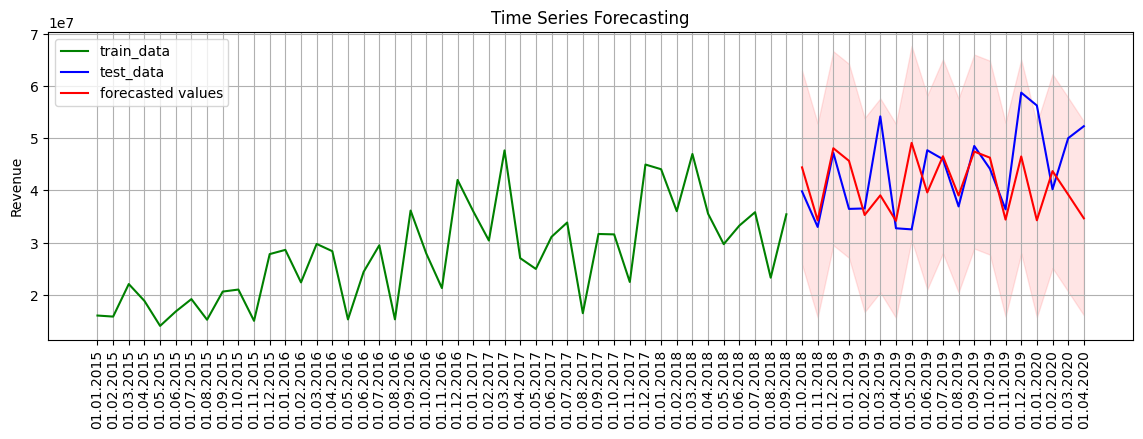

In [19]:
#set the size of the plot
plt.rcParams['figure.figsize'] = [14, 4]

# Train data
plt.plot(train_index, data[:train_len], label = "train_data", color = "g")

# Test data
plt.plot(test_index, data[train_len:], label = "test_data", color = "b")

# Calculate the confidence interval of the prediction
rmse = np.sqrt(average_test_loss)
se = 1.96*rmse
upper_bound = [x+se for x in forecasted_values]
lower_bound = [x-se for x in forecasted_values]

#Forecasted Values
#reverse the scaling transformation
forecasted_cases = scaler.inverse_transform(np.expand_dims(forecasted_values, axis=0)).flatten()
upper_bound = scaler.inverse_transform(np.expand_dims(upper_bound, axis=0)).flatten()
lower_bound = scaler.inverse_transform(np.expand_dims(lower_bound, axis=0)).flatten()
# plotting the forecasted values
plt.plot(test_index, forecasted_cases, label='forecasted values', color='red')
plt.fill_between(test_index, lower_bound, upper_bound, color='red', alpha=0.1)

plt.ylabel('Revenue')
plt.legend()
plt.xticks(rotation=90)
plt.title('Time Series Forecasting')
plt.grid(True)